In [165]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits,load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
np.random.seed(42)

### <font color='blue'>A cluster refers to a collection of data points aggregated together because of certain similarities.</font>

### K-means clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. The k-means algorithm can be summarised as the following three steps.

- Initialisation – K initial “means” (centroids) are generated at random
- Assignment – K clusters are created by associating each observation with the nearest centroid
- Update – The centroid of the clusters becomes the new mean

Assignment and Update are repeated iteratively until convergence.

<div class="alert alert-block alert-warning">

### K-means clustring on handwritten digit data


</div>

In [166]:
digits = load_digits()
data = digits.data
target = digits.target
print(target.shape)

(1797,)


In [167]:
n_samples, n_features = data.shape
n_digits = len(np.unique(target))
print(n_digits)

10


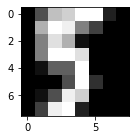

In [168]:
fig,ax = plt.subplots(figsize=(2,2))
plt.imshow(data[15,:].reshape(8,8),cmap='gray')

In [169]:
data = scale(data)

### Apply PCA  for both dimensionality reduction and visualization purposes

In [170]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

### Apply KMneas on the dimensionarity reducted data

In [171]:
kmeans = KMeans(init='k-means++',n_clusters=n_digits)
kmeans.fit(reduced_data)
kmeans_preds = kmeans.predict(reduced_data)

### Visualize the data

In [172]:
h = .02 
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [173]:
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

In [174]:
Z = Z.reshape(xx.shape)

In [175]:
centroids = kmeans.cluster_centers_

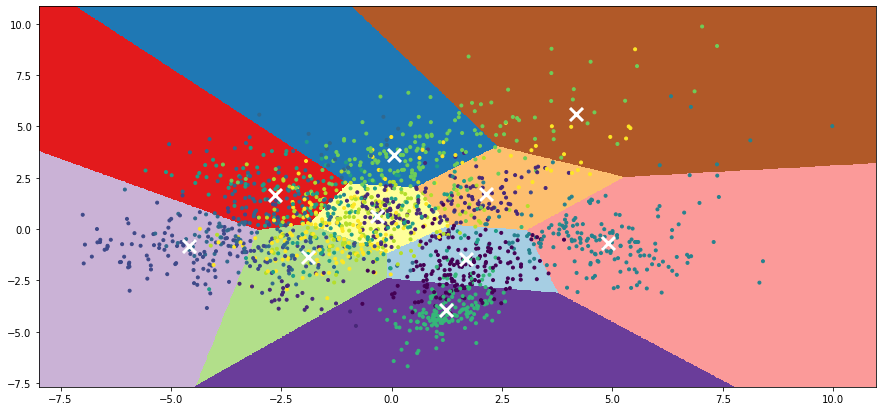

In [176]:
ax, fig = plt.subplots(figsize=(15,7))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=target,marker='.')

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 1

Apply kmeans in the original feature space (before reducing dimension). Compare the result of clustering before dimensionality reduction and after dimensionality reduction.

One way to compare is to compare both of them (before and after dimensionality reduction) to the actual target (Note that in clustering you do not have target or label for data. The comparision to target is meaningless or impractical in real applications. Here, we do this for understading the effect of dimensionality reduction on clustering result).

To compare find a mapping between cluster outputs and target. After finding the mapping you can calculate accuracy or calculate ROC().

</div>

In [177]:
kmeans = KMeans(init='k-means++',n_clusters=n_digits)
kmeans.fit(data)
kmeans_preds_withoutPCA= kmeans.predict(data)

In [178]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics.cluster import homogeneity_score
print("The accuracy score without performing PCA:",metrics.accuracy_score(kmeans_preds_withoutPCA,target))
print("The accuracy score with performing PCA:",metrics.accuracy_score(kmeans_preds,target))

The accuracy score without performing PCA: 0.09348914858096828
The accuracy score with performing PCA: 0.14301613800779076


In [179]:
print("The confusion matrix without performing PCA:\n",metrics.confusion_matrix(kmeans_preds_withoutPCA,target))

The confusion matrix without performing PCA:
 [[  0   0  80   7   1  70   0   7  11   1]
 [  0  58   4   0   7   3   1   3  15  19]
 [  0   0   6 160   0  78   0   0  44 146]
 [  0   0   0   0   9   0   0  18   0   3]
 [177   0   0   0   0   0   1   0   0   0]
 [  0   0   1   7   4   5   0 151   2   8]
 [  1   0   0   0 158   4   0   0   0   0]
 [  0  27  46   1   0   0   0   0   0   0]
 [  0  97  40   8   2  18   4   0  99   3]
 [  0   0   0   0   0   4 175   0   3   0]]


In [180]:
print("The confusion matrix with performing PCA:\n",metrics.confusion_matrix(kmeans_preds,target))

The confusion matrix with performing PCA:
 [[121   7   1   4  13  10  19   0  10   4]
 [  0   4   1  15   0  11   0 106   8  11]
 [  2  27  35  42   0  27   0   0  30  68]
 [  6   0   0   0 147   1   0   0   0   0]
 [  0   0  19  76   2  66   0  12  29  21]
 [  1  67   5   0  12   9   1  15  21   9]
 [  0   0 107  39   0   3   0   0   2   7]
 [ 45   2   0   0   0   0 161   0   0   0]
 [  3  75   9   7   1  55   0  11  74  48]
 [  0   0   0   0   6   0   0  35   0  12]]


In [181]:
print("The homogenity score without performing PCA:\n",homogeneity_score(kmeans_preds_withoutPCA,target))

The homogenity score without performing PCA:
 0.6584662963152943


In [182]:
print("The homogenity score without performing PCA:\n",homogeneity_score(kmeans_preds,target))

The homogenity score without performing PCA:
 0.469023648662573


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 2

- Load IRIS dataset and apply kmeans.


- Gradually increase number of clusters and plot the elbow curve.


</div>

In [183]:
iris_data, iris_target = load_iris().data, load_iris().target

In [184]:
iris_data.shape

(150, 4)

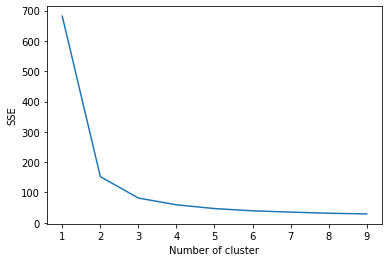

In [185]:
iris = load_iris()
X = pd.DataFrame(iris_data)
X.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
data = X
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


<div class='alert alert-block alert-warning' style='font-size:150%'>

### Hierarchical Clustering


</div>

Agglomerative Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: 
- 1) identify the two clusters that are closest together, and 
- 2) merge the two most similar clusters. 
- 3) Repeat step 1 and 2 until all the clusters are merged together. 


There is another version of hierarchical clustering which is called divisive. It starts by considering all data to be one cluster then divide to find smaller clusters. However, agglomerative is much more common.

In [186]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [187]:
# generate the linkage matrix
Z = linkage(iris_data, 'ward')

In [188]:
iris_data.shape

(150, 4)

In [189]:
Z.shape

(149, 4)

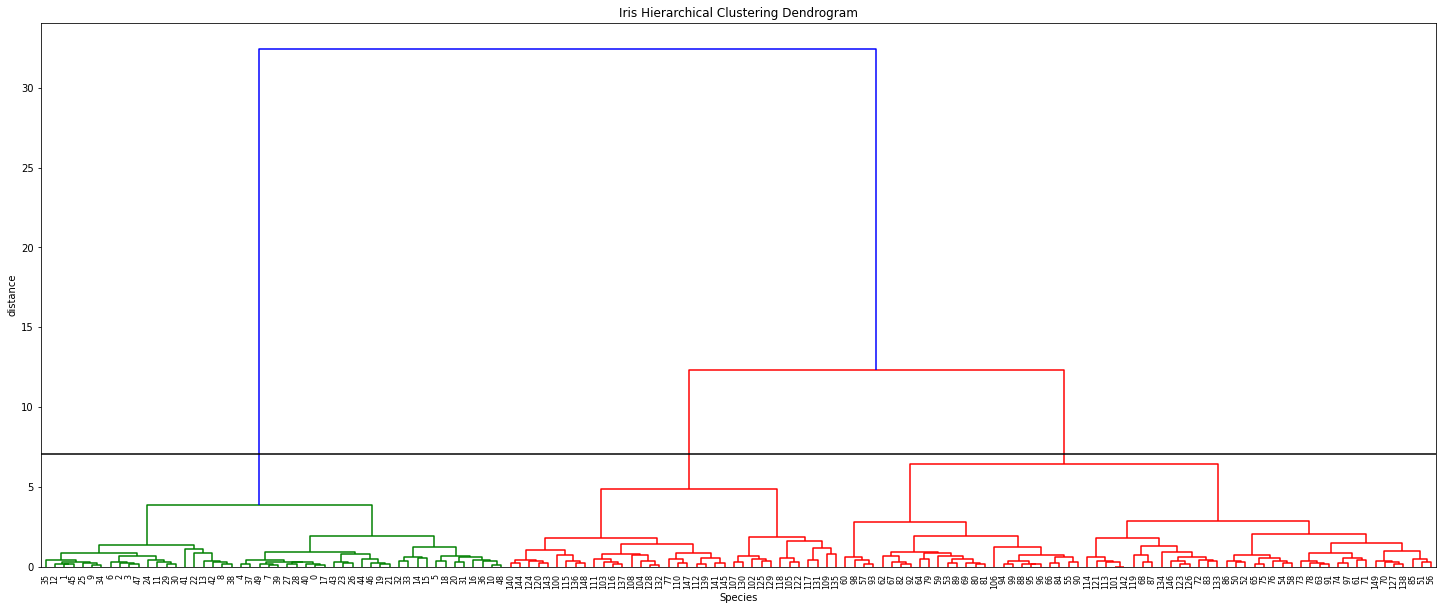

In [190]:
plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
max_d = 7.08 
plt.axhline(y=max_d, c='k')
plt.show()

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 3

- Design an artificial dataset where the clusters are visually separable but when you apply hierarchical clustering yields poor result.


- Do the same for K-means

</div>

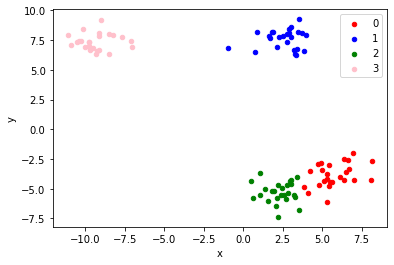

In [191]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=4, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green',3:'pink'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

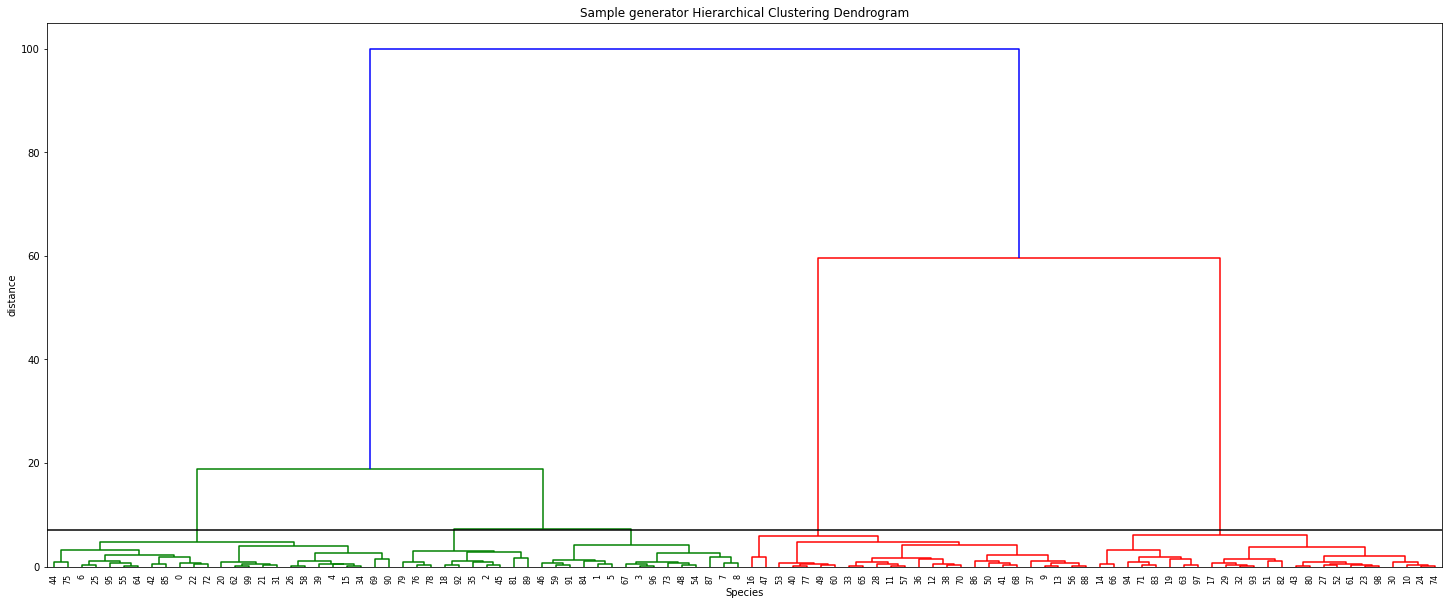

In [192]:
#applying hierachical clustering on the generated dataset
M=linkage(X, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Sample generator Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    M,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
max_d = 7.08 
plt.axhline(y=max_d, c='k')
plt.show()

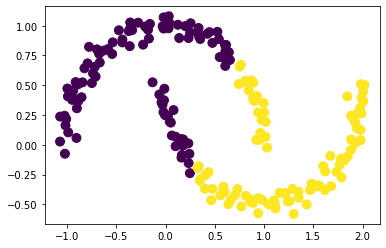

In [193]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=80)

<div class='alert alert-block alert-warning' style='font-size:150%'>

### DBSCAN

</div>

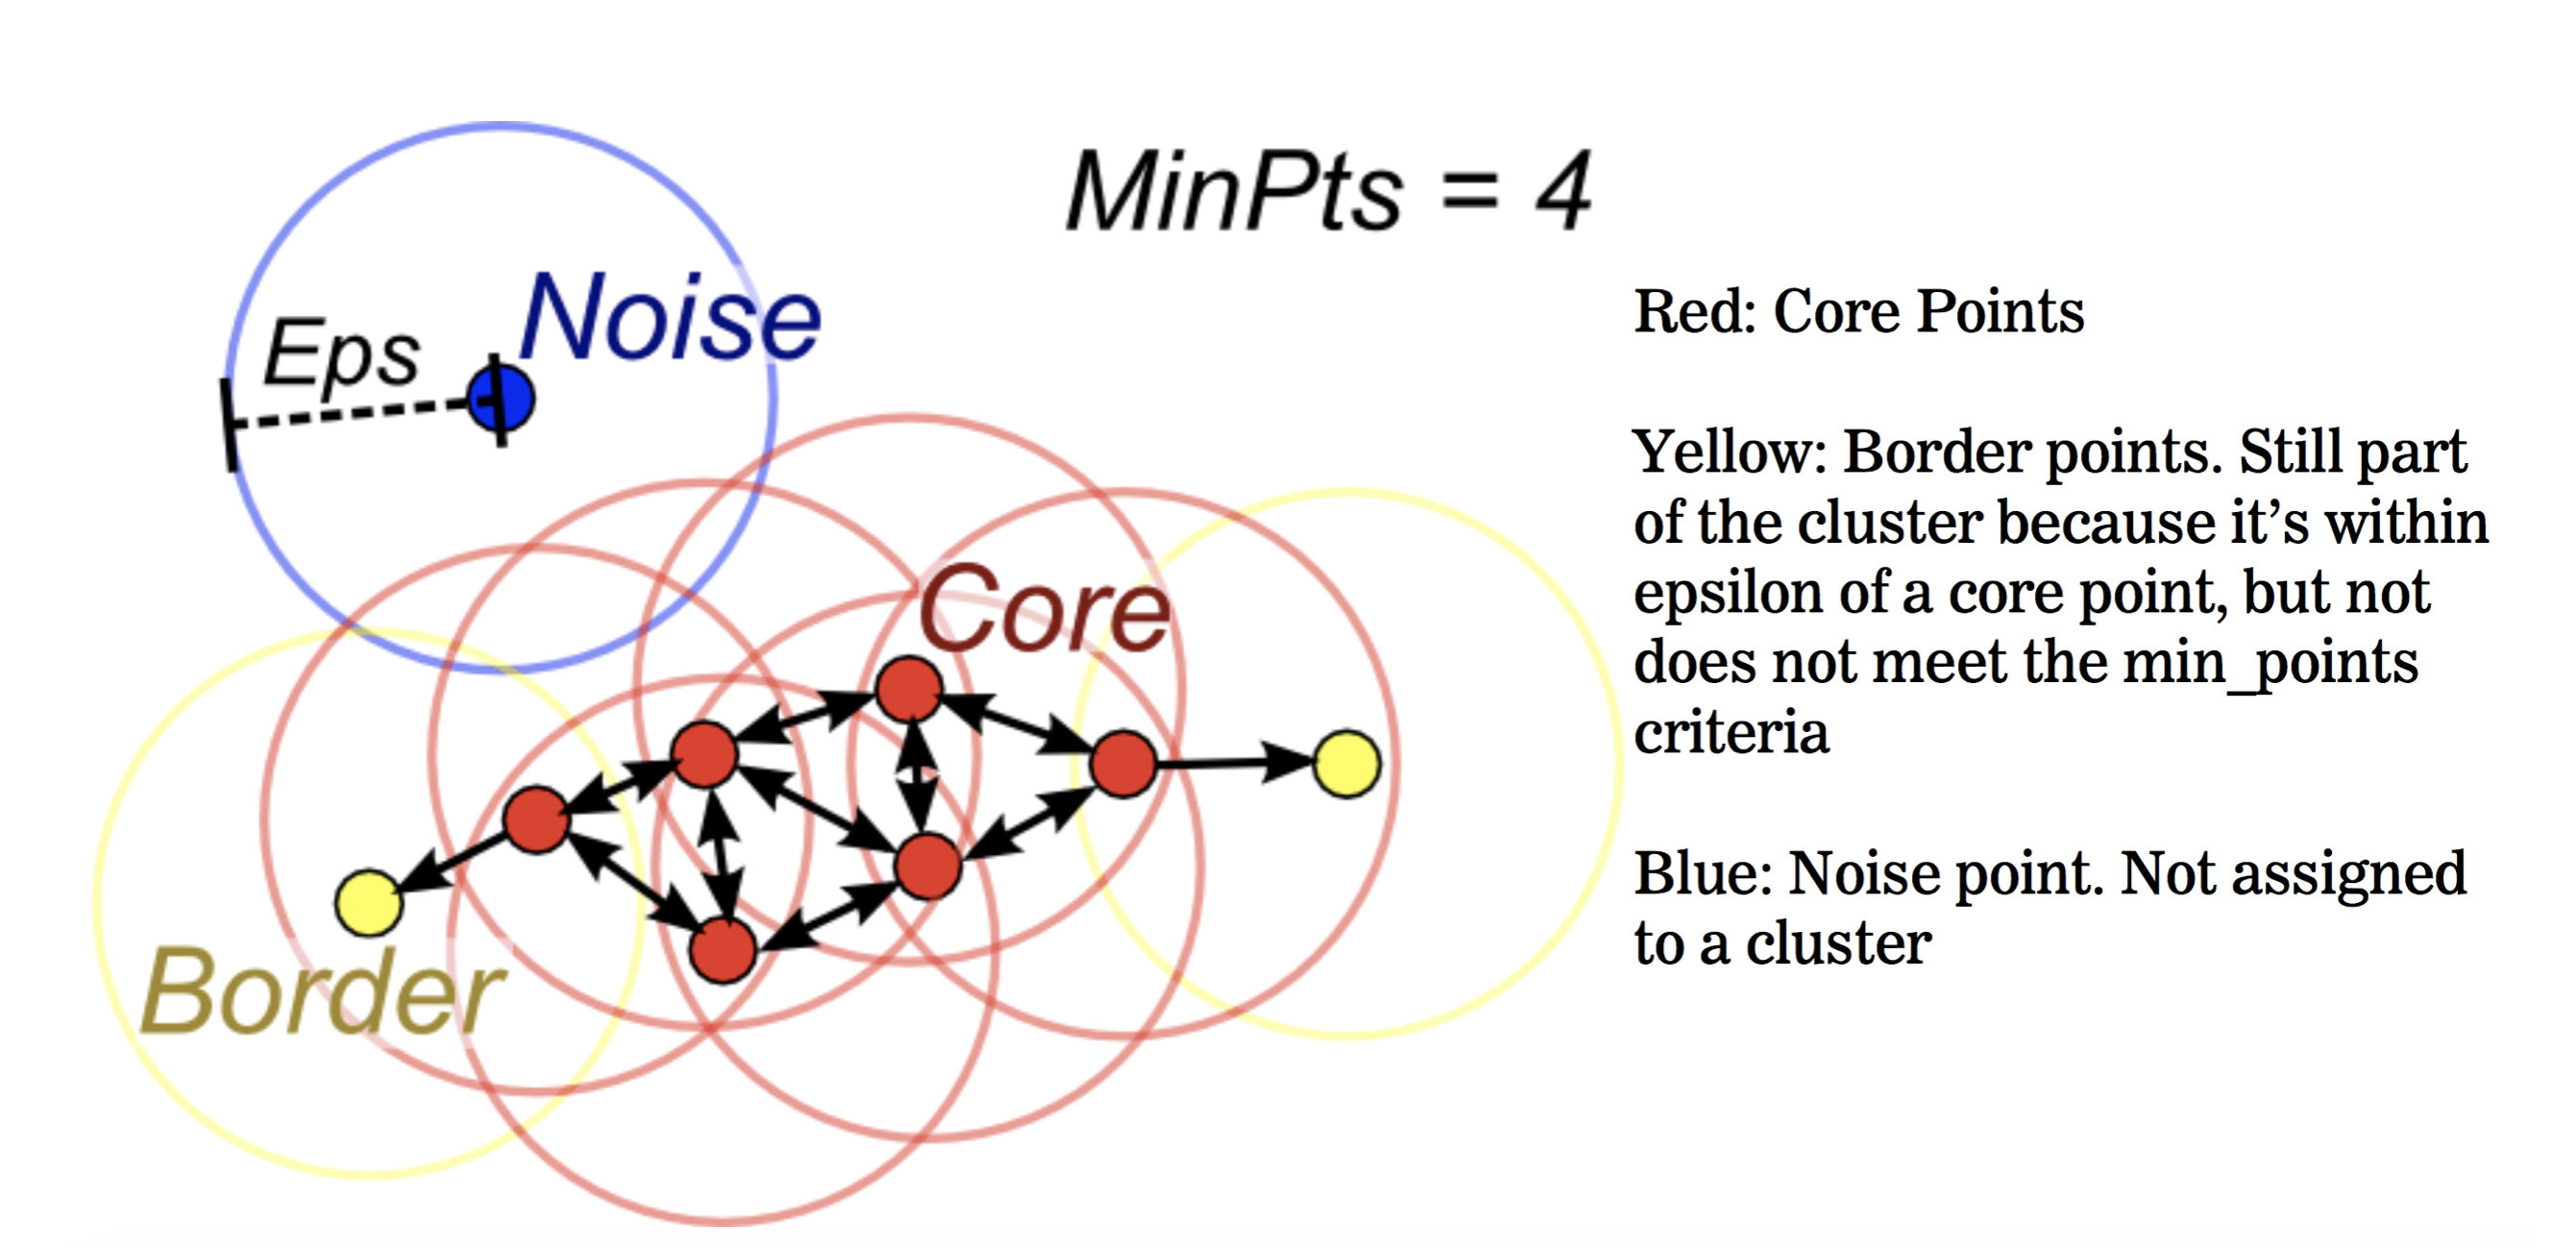

In [194]:
Image("./Images/dbscan.png")

In [195]:
from sklearn.cluster import DBSCAN

In [196]:
scaler = StandardScaler()

In [197]:
X = scaler.fit_transform(iris_data)

In [198]:
clustering = DBSCAN(eps=0.5, min_samples=5).fit(X)

In [199]:
clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

# DBSCAN implementation from scratch

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 4

Complete the neighborQuery function. The goal is to find all the data-points in X which are within eps distance from datapoint P.

</div>

In [200]:
def neighborQuery(X,p,eps):
    
    # X: Dataset
    # p: a single datapoint
    # eps: Threshold for distance
    
    neighbors =[]   # List of points that are going to be within eps distance from p
    
    # Write a loop and add all points that are within eps distance from p to "neighbors"
    for i in range(0,len(X)):
        
        if np.linalg.norm(X[p]-X[i])<eps:
            neighbors.append(i)
        
    return neighbors


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 5

Complete the grow_cluster function. The goal is to to grow a new cluster from seed_index with label C.

</div>

In [201]:
def grow_cluster(X,labels,seed_index,C,neighbors,eps,MinPts):
    
    # The purpose of this function is to grow a new clustr from seed_index with label C
    
    # X: Dataset
    # labels: list of labels for all datapoint in X
    # seed_index: Index of the seed point the this new cluster
    # neighbors: Neighbors of P
    # C: Label of this new cluster
    # eps: Threshold for distance
    # MinPts: Minimum number of points in the cluster
    labels[seed_index] = neighbors
    
    i = 0
    while i < len(C):    
        
            
        Pn = C[i]
       

        if labels[Pn] == -1:
            labels[Pn] = neighbors
        

        elif labels[Pn] == 0:
            labels[Pn] = neighbors
            
            
            PnNeighborPts = neighborQuery(X,Pn,eps)
            

            if len(PnNeighborPts) >= MinPts:
                C = C + PnNeighborPts

        i += 1
    

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 6

Complete the dbscan function. This function uses the previous two functions. The instruction is described inside the function.

</div>

In [202]:
def dbscan(X,eps,MinPts):
    
    # eps: distance within which neighorhood for each datapoint is determined
    # MinPts: Min number of points a cluster can have
    # This function is the main function to cluster dataset X
    
    # It will return cluster label for each datapoint and cluster label -1 represents noise
    
    
    # Define list "labels" and set it initially with all zeros. Zero mean that a datapoint is not assinged a 
    # label yet
    
    labels = [0]*len(X) #-----
    
    # Set "current_clust" as the id of current cluster
    current_clust = 0
    for p in range(0,len(X)):
        if not(labels[p]==0):
            continue
        neighbours=neighborQuery(X,p,eps)
        if len(neighbours)<MinPts:
            labels[p]=-1
        else:
            current_clust+=1
            labels[p]=current_clust
            grow_cluster(X,labels,p,neighbours,current_clust,eps,MinPts)
    return labels
    
    # Loop through all data points. Check for cluster label, it it is not zero it means it is assigned already.
    # If it "is assiged skip and go to the next data point. For data points with clust_label=0 find the neighbors
    # using "neighborQuery" function. Now, if number of neighbors are less than MinPts it will be considered as
    # noise point, otherwise it is time to consider this datapoint as the new seed for forming a cluster. In that
    # we need to have a function to grow a new cluster from this seed point.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 7

Compare the result of your version with this sklearn dbscan library. 

Notice that depending on the random seeds you will get probably different results. However, you can get the sense if you implemented correctly.

</div>

In [203]:
#Evaluating the DBSCAN written from scartch 
from sklearn import metrics
clustering1=dbscan(X,0.5,5)
print("This is the DBSCAN written from scratch")
print("Evaluating using the siluette coefficient:%0.3f"%metrics.silhouette_score(X,clustering1))

This is the DBSCAN written from scratch
Evaluating using the siluette coefficient:0.357


In [204]:
#Evaluating the DBSCAN from scikit-learn
clustering = DBSCAN(eps=0.5, min_samples=5).fit(X)
clustering.labels_
print("This is the DBSCAN using scikit-learn")
print("Evaluating using the siluette coefficient:%0.3f"%metrics.silhouette_score(X,clustering.labels_))

This is the DBSCAN using scikit-learn
Evaluating using the siluette coefficient:0.357


In [205]:
"""
From the above metric we can see that both the models are the same, as it has the same score.
"""

'\nFrom the above metric we can see that both the models are the same, as it has the same score.\n'

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 8

Run the completed algorithm on the iris and mnist dataset. Compare to the result the clustering algorithms in the previous parts.

</div>

In [206]:
clustering3=dbscan(reduced_data,0.5,5)
print("This is the DBSCAN written from scratch")
print("Evaluating using the siluette coefficient:%0.3f"%metrics.silhouette_score(reduced_data,clustering3))

This is the DBSCAN written from scratch
Evaluating using the siluette coefficient:-0.191


In [207]:
clustering = DBSCAN(eps=0.5, min_samples=5).fit(reduced_data)
clustering.labels_
print("This is the DBSCAN using scikit-learn")
print("Evaluating using the siluette coefficient:%0.3f"%metrics.silhouette_score(reduced_data,clustering.labels_))

This is the DBSCAN using scikit-learn
Evaluating using the siluette coefficient:-0.191


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 9 (Arbitrary to get extra scores)

There is a type of clustering called "Spectral Clustering" built upon concepts of graph theory and linear algebra. The following link contains a tutorial on that. There are multiple tutorials and sources that you can find as well. 

http://people.csail.mit.edu/dsontag/courses/ml14/notes/Luxburg07_tutorial_spectral_clustering.pdf

- Write a quick report about what you understand.
- implement the algorithm.



</div>